In [10]:
!pip install numpy==1.24.4 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 94.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.4 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.0 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is in

In [2]:
!pip install prefetch_generator lmdb -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 8.0 MB/s eta 0:00:00


In [4]:
!cp -r /content/drive/MyDrive/NCKH_2425/DatasetOCR/vietocr_project .

In [2]:
%cd vietocr_project

/content/vietocr_project


In [6]:
!git clone https://github.com/htrnguyen/vietocr.git

Cloning into 'vietocr'...
remote: Enumerating objects: 3262, done.
remote: Counting objects: 100% (766/766), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 3262 (delta 706), reused 664 (delta 663), pack-reused 2496 (from 2)
Receiving objects: 100% (3262/3262), 2.11 MiB | 18.59 MiB/s, done.
Resolving deltas: 100% (2422/2422), done.


In [3]:
import sys
import os
sys.path.append('/content/vietocr_project/vietocr')

In [4]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

In [5]:
# 1. Load cấu hình
config = Cfg.load_config_from_name('vgg_transformer')

In [13]:
# 2. Cập nhật đường dẫn dữ liệu
config['dataset'].update({
    'name': 'hw',
    'data_root': '/content/vietocr_project/images',
    'train_annotation': '../train_annotation.txt',
    'valid_annotation': '../test_annotation.txt'
})

# 3. Cập nhật thông số huấn luyện
config['trainer'].update({
    'print_every': 200,
    'valid_every': 2000,
    'iters': 10000,
    'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
    'export': './weights/transformerocr.pth',
    'metrics': 5000
})

In [14]:
# 4. Cập nhật device
config['device'] = 'cuda:0'

In [15]:
# 5. (Tuỳ chọn) Tự động cập nhật vocab từ dữ liệu
def extract_vocab_from_labels(label_files):
    chars = set()
    for fpath in label_files:
        with open(fpath, 'r', encoding='utf-8') as f:
            for line in f:
                try:
                    _, label = line.strip().split('\t')
                    chars.update(label)
                except:
                    continue
    return ''.join(sorted(chars))

vocab = extract_vocab_from_labels([
    '/content/vietocr_project/train_annotation.txt',
    '/content/vietocr_project/test_annotation.txt'
])
config['vocab'] = vocab
config['vocab']

" !%&'(),-./0123456789:ABCDEFGHIJKLMNOPQRSTUVWXYZ\\abcdefghijklmnopqrstuvwxyzÀÁÂÈÉÊÌÍÒÓÔÙÚÝàáâãèéêìíòóôùúĂăĐđĨŨũŪƠơƯưẠạẢảẤấẦầẨẩẫẬậẮắẰằẵẶặẸẹẺẻẾếỀềỂểỄỆệỉỊịỌọỎỏỐốỒồỔổỖỘộỚớỜờỞởỠỡỢợỤụỦủỨứỪừỬửỮữỰựỲỸ"

In [17]:
# !rm -rf train_hw valid_hw

In [18]:
# 6. Khởi tạo trainer
trainer = Trainer(config, pretrained=True)

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
transformer.embed_tgt.weight missmatching shape, required torch.Size([194, 256]) but found torch.Size([233, 256])
transformer.fc.weight missmatching shape, required torch.Size([194, 256]) but found torch.Size([233, 256])
transformer.fc.bias missmatching shape, required torch.Size([194]) but found torch.Size([233])


Create train_hw: 100%|█████████████████████████████████████████| 2055/2055 [00:10<00:00, 192.81it/s]

Created dataset with 2054 samples



Create valid_hw: 100%|███████████████████████████████████████████| 228/228 [00:00<00:00, 258.37it/s]


Created dataset with 227 samples


valid_hw build cluster: 100%|█████████████████████████████████| 227/227 [00:00<00:00, 100443.82it/s]


In [19]:
# 8. Bắt đầu train
trainer.train()

iter: 000200 - train loss: 1.655 - lr: 3.96e-05 - load time: 19.92 - gpu time: 45.02
iter: 000400 - train loss: 1.332 - lr: 1.12e-04 - load time: 19.69 - gpu time: 41.89
iter: 000600 - train loss: 1.129 - lr: 2.01e-04 - load time: 19.15 - gpu time: 42.54
iter: 000800 - train loss: 0.872 - lr: 2.73e-04 - load time: 20.72 - gpu time: 42.87
iter: 001000 - train loss: 0.712 - lr: 3.00e-04 - load time: 18.08 - gpu time: 42.01
iter: 001200 - train loss: 0.626 - lr: 3.00e-04 - load time: 19.30 - gpu time: 42.45
iter: 001400 - train loss: 0.570 - lr: 2.99e-04 - load time: 19.78 - gpu time: 41.41
iter: 001600 - train loss: 0.545 - lr: 2.97e-04 - load time: 19.57 - gpu time: 43.41
iter: 001800 - train loss: 0.509 - lr: 2.94e-04 - load time: 18.59 - gpu time: 42.72
iter: 002000 - train loss: 0.486 - lr: 2.91e-04 - load time: 18.41 - gpu time: 42.66


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


iter: 002000 - valid loss: nan - acc full seq: 1.0000 - acc per char: nan
iter: 002200 - train loss: 0.471 - lr: 2.87e-04 - load time: 18.81 - gpu time: 42.31
iter: 002400 - train loss: 0.447 - lr: 2.82e-04 - load time: 19.97 - gpu time: 42.60
iter: 002600 - train loss: 0.425 - lr: 2.77e-04 - load time: 18.81 - gpu time: 42.17
iter: 002800 - train loss: 0.421 - lr: 2.71e-04 - load time: 18.50 - gpu time: 42.94
iter: 003000 - train loss: 0.406 - lr: 2.65e-04 - load time: 19.59 - gpu time: 42.68
iter: 003200 - train loss: 0.393 - lr: 2.58e-04 - load time: 18.71 - gpu time: 43.06
iter: 003400 - train loss: 0.395 - lr: 2.50e-04 - load time: 19.66 - gpu time: 42.05
iter: 003600 - train loss: 0.388 - lr: 2.42e-04 - load time: 17.37 - gpu time: 42.71
iter: 003800 - train loss: 0.373 - lr: 2.34e-04 - load time: 19.67 - gpu time: 42.62
iter: 004000 - train loss: 0.378 - lr: 2.25e-04 - load time: 19.83 - gpu time: 43.08
iter: 004000 - valid loss: nan - acc full seq: 1.0000 - acc per char: nan
it

In [23]:
import os
assert os.path.exists(config['trainer']['export']), "File mô hình chưa được lưu!"
print("Mô hình đã được lưu:", config['trainer']['export'])


Mô hình đã được lưu: ./weights/transformerocr.pth


In [26]:
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

config = Cfg.load_config_from_name('vgg_transformer')

config['vocab'] = vocab

config['weights'] = './weights/transformerocr.pth'
config['device'] = 'cuda:0'

# Tạo predictor
predictor = Predictor(config)

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
import os

img_path = '/content/vietocr_project/images/001_heo-cao-boi_F_w0.png'
image = Image.open(img_path).convert('RGB')

pred = predictor.predict(image)
print("Kết quả nhận dạng:", pred)

Kết quả nhận dạng: HEO CAO BỒI


Tổng số mẫu test: 228



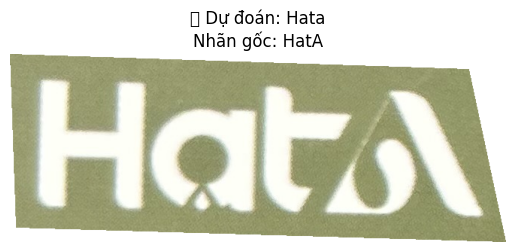

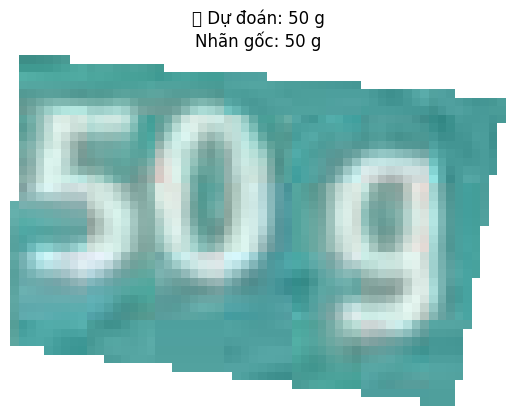

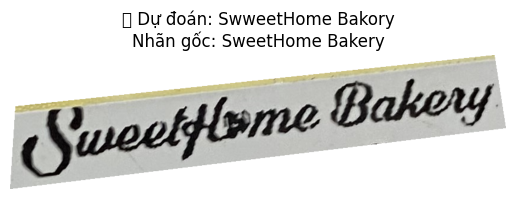

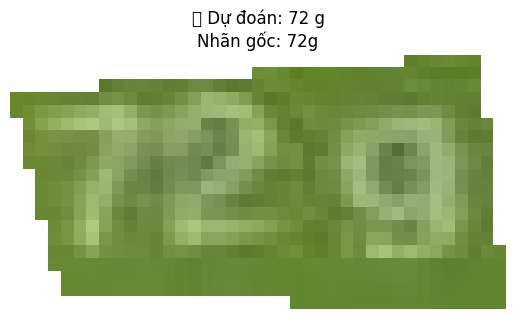

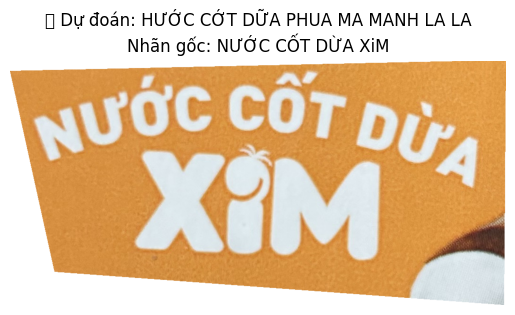

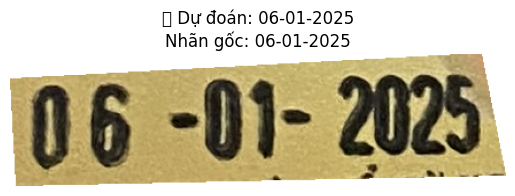

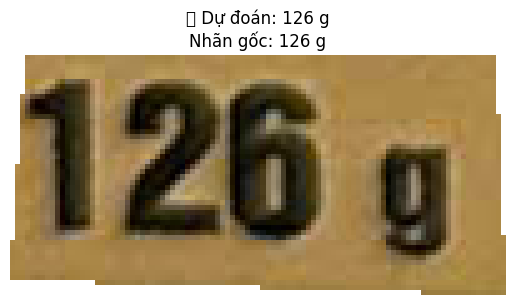

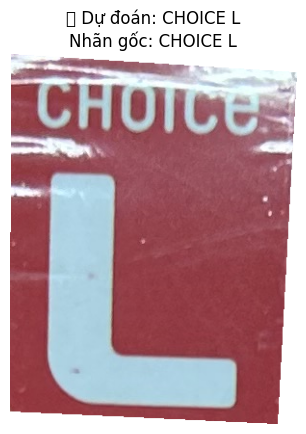

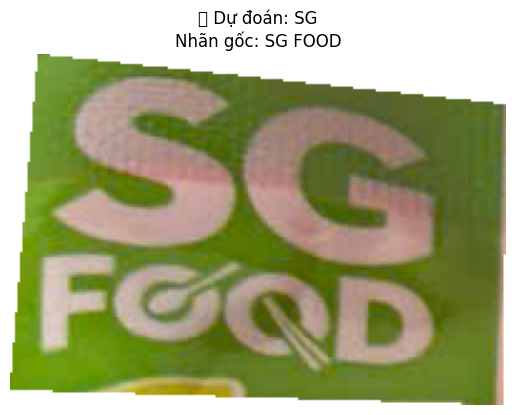

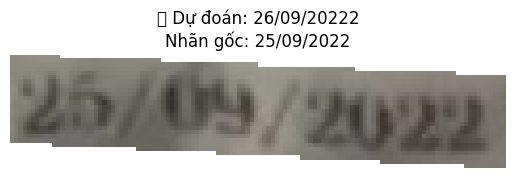

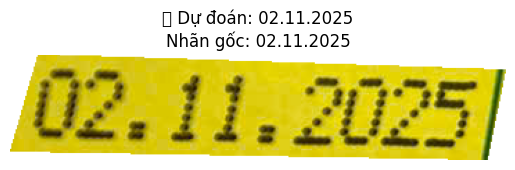

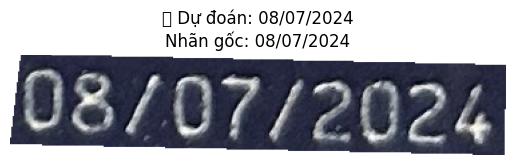

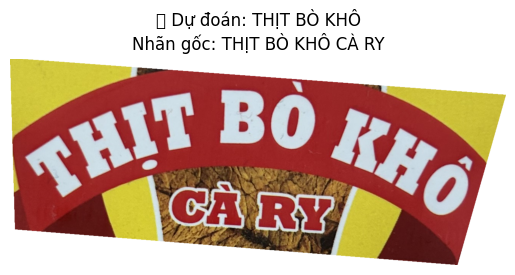

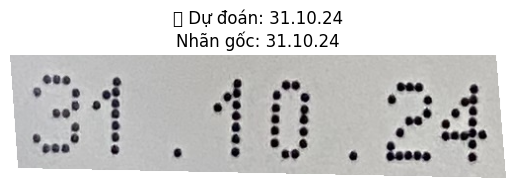

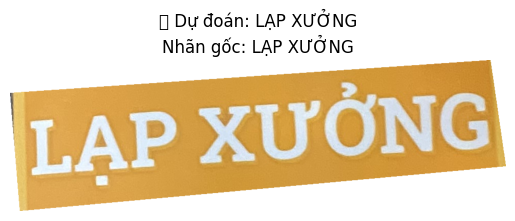

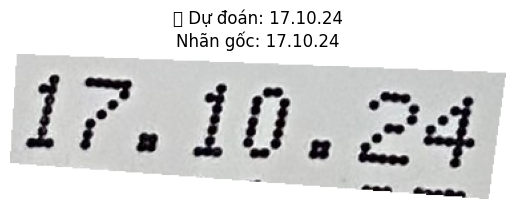

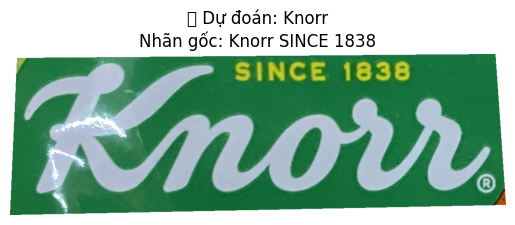

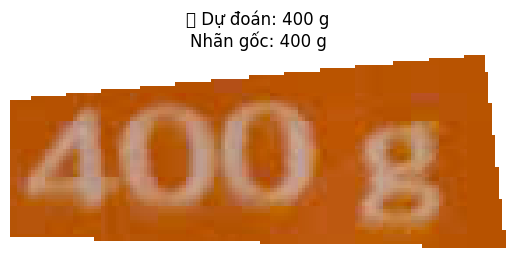

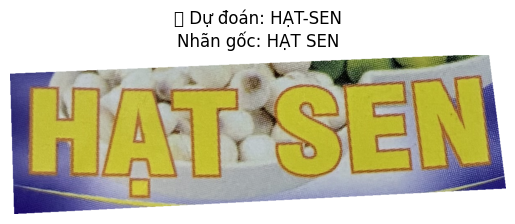

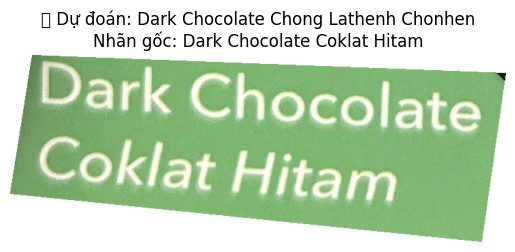

In [35]:
test_file = '/content/vietocr_project/test_annotation.txt'
image_root = '/content/vietocr_project/images'

with open(test_file, 'r', encoding='utf-8') as f:
    lines = f.readlines()

print(f"Tổng số mẫu test: {len(lines)}\n")

for i, line in enumerate(lines[:20]):
    if '\t' not in line:
        print(f"Lỗi dòng {i + 1}: không có tab phân cách.")
        continue
    img_rel_path, label = line.strip().split('\t')
    img_path = os.path.join(image_root, img_rel_path)

    try:
        image = Image.open(img_path).convert('RGB')
        pred = predictor.predict(image)

        # Hiển thị ảnh + kết quả
        plt.imshow(image)
        plt.axis('off')
        plt.title(f'🔍 Dự đoán: {pred}\nNhãn gốc: {label}', fontsize=12)
        plt.show()
    except Exception as e:
        print(f"Lỗi ảnh {img_path}: {e}")